In [ ]:
def node1(input1):
    return f"Hello from: {input1}\n"

def node2(input2):
    return f"Output of Node-1: {input2} and Hello from Node-2\n"

In [72]:
from langchain_core.tools import tool

def routing_logic(input3):
    # If the input is more than 10 size, then we route to the "tools" node
    if len(input3)>10:
        return "tool"
    # Otherwise, we stop (reply to the user)
    else:
        return END

#@tool()
def some_tool():
    #"""Call to slice the string"""
    #This tool slices the input to size 10
    return 'tool_input[:10]'

#tools = [some_tool]


In [80]:
from langgraph.prebuilt import ToolNode
from langgraph.graph import END, START, Graph

workflow = Graph()

workflow.add_node("Node-1", node1)
workflow.add_node("Node-2", node2)

#tool_node = ToolNode(tools)
workflow.add_node("tool", some_tool)

workflow.add_edge(START, "Node-1")
workflow.add_edge("Node-1", "Node-2")


# We now add a conditional edge
workflow.add_conditional_edges(
    # First, we define the start node. We use `agent`.
    # This means these are the edges taken after the `agent` node is called.
    "Node-2",
    # Next, we pass in the function that will determine which node is called next.
    routing_logic
)
workflow.add_edge("tool", END)

basic_graph = workflow.compile()

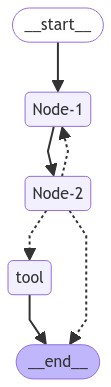

In [81]:
from IPython.display import Image, display

try:
    display(Image(basic_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [34]:
for output in basic_graph.stream("Node-1"):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"'{key}':")
        print("---")
        print(value)
    print("\n~~~~~~~~\n")

'Node-1':
---
Hello from: Node-1


~~~~~~~~

'Node-2':
---
Output of Node-1: Hello from: Node-1
 and Hello from Node-2


~~~~~~~~



In [ ]:
import operator
from langchain_core.messages import BaseMessage
from typing import TypedDict, Annotated, Sequence

class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]